In [1]:
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
import keras
keras.__version__
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
df = pd.read_csv('./export_data/negative_direction/fillNA-mean/5-5/my_data_clean.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,process_name,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,...,4_2,4_3,4_4,a4,filename,height,hot_spot_nums,maxtmp,meantmp,tmp_integral
0,97,18.478268,29.377523,30.381542,24.582974,17.121124,24.635447,24.500401,24.188029,24.642875,...,24.604789,24.700000,17.596124,1.741966,20191205141649-2,180.8,0,30.1,24.7,0
1,98,8.569983,28.677213,28.844847,26.820977,8.551293,20.239664,24.731054,24.250235,24.539987,...,24.770131,24.700000,8.518029,2.012180,20191205141651-2,154.4,0,34.8,24.7,85
2,99,16.934404,25.300000,25.142694,21.729030,17.025045,21.715539,25.167267,25.228112,25.298036,...,31.283525,30.282150,18.793558,0.183852,20191205141653-2,121.5,1,30.9,25.3,14
3,100,3.576483,24.039302,28.068964,26.005633,6.694787,21.322800,24.731257,24.496585,24.387854,...,24.799968,23.103541,4.098558,2.299696,20191205141655-2,155.4,0,30.1,24.8,103
4,101,16.455826,20.890401,24.391891,24.961677,17.639127,24.772300,24.462992,24.350471,24.620136,...,24.642909,21.805469,17.428275,2.966194,20191205141657-2,148.3,0,28.5,24.7,0
5,102,3.544191,22.679577,25.100000,23.650756,5.819062,21.987737,25.100000,24.969998,24.842950,...,25.389769,23.431584,4.089433,-0.814723,20191205141659-2,141.2,1,29.6,25.1,463
6,103,8.167097,25.200000,25.200000,20.074552,8.360780,20.547291,24.902160,25.026094,25.200000,...,29.678991,28.456991,9.237758,0.435923,20191205141701-2,174.1,1,38.4,25.2,224
7,104,20.216045,29.928346,31.413032,24.607045,18.810963,25.712042,24.751303,24.537522,24.964577,...,24.895702,25.000000,19.291732,1.705961,20191205141703-2,178.1,0,29.5,25.0,451
8,105,3.919735,23.815177,25.199224,24.109341,6.417877,21.155617,25.200000,25.092029,25.363972,...,25.374666,24.090757,4.359545,-0.901580,20191205141705-2,150.3,1,29.2,25.2,823
9,106,11.554938,24.964509,24.664094,19.607787,11.696644,19.509675,24.920557,24.396992,24.477916,...,24.686298,24.700000,12.576938,-2.833010,20191205141707-2,156.6,1,35.9,24.7,199


In [4]:
useless = ['0_0','0_4','4_0','4_4','a4','filename','process_name']
cols = list(set(df.columns)-set(useless))
features = ['height','tmp_integral','hot_spot_nums','meantmp','maxtmp']#5个
target_cols = list(set(cols)-set(features))
data = df[cols]
data = data.sort_index(axis=1)
data.head()


,0_1,0_2,0_3,1_0,1_1,1_2,1_3,1_4,2_0,2_1,...,3_3,3_4,4_1,4_2,4_3,height,hot_spot_nums,maxtmp,meantmp,tmp_integral
0,29.377523,30.381542,24.582974,24.635447,24.500401,24.188029,24.642875,24.700000,25.663555,24.439976,...,24.697384,21.865700,21.515725,24.604789,24.700000,180.8,0,30.1,24.7,0
1,28.677213,28.844847,26.820977,20.239664,24.731054,24.250235,24.539987,24.700000,25.013562,24.404375,...,24.700000,20.112139,19.784244,24.770131,24.700000,154.4,0,34.8,24.7,85
2,25.300000,25.142694,21.729030,21.715539,25.167267,25.228112,25.298036,25.300000,25.628195,25.090716,...,24.644457,24.520420,25.909492,31.283525,30.282150,121.5,1,30.9,25.3,14
3,24.039302,28.068964,26.005633,21.322800,24.731257,24.496585,24.387854,24.931452,24.963351,24.576181,...,24.800000,21.904641,21.311117,24.799968,23.103541,155.4,0,30.1,24.8,103
4,20.890401,24.391891,24.961677,24.772300,24.462992,24.350471,24.620136,23.971977,24.480732,24.518355,...,24.696415,24.700000,24.700000,24.642909,21.805469,148.3,0,28.5,24.7,0


In [5]:
data.columns

Index(['0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '1_4', '2_0', '2_1',
       '2_2', '2_3', '2_4', '3_0', '3_1', '3_2', '3_3', '3_4', '4_1', '4_2',
       '4_3', 'height', 'hot_spot_nums', 'maxtmp', 'meantmp', 'tmp_integral'],
      dtype='object')

In [6]:
data.shape

(26147, 26)

In [7]:
# data = data[['0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '1_4', '2_0', '2_1',
#        '2_2', '2_3', '2_4', '3_0', '3_1', '3_2', '3_3', '3_4', '4_1', '4_2',
#        '4_3','height']]
data = data[['1_1','height']]

In [8]:
data.head()

,1_1,height
0,24.500401,180.8
1,24.731054,154.4
2,25.167267,121.5
3,24.731257,155.4
4,24.462992,148.3


In [9]:
float_data  = data.values 

In [79]:
# 10.145460518815907*std

array([  14.60476842, 2358.39261119])

In [10]:
float_data.shape

(26147, 2)

In [11]:
# #标准化
mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
index = (std == 0.0)
std[index] = 1
float_data /= std

In [12]:
float_data

array([[ 1.45757584, -1.59598679],
       [ 1.61780301, -1.70955573],
       [ 1.92082654, -1.85108673],
       ...,
       [-0.48778907,  1.573189  ],
       [-0.48777205,  1.50737064],
       [-0.48777205,  1.56501548]])

In [13]:
float_data.shape

(26147, 2)

In [14]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                          data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
#             index_11 = (targets[j] >=30)
#             index_22 = (targets[j] <30)
#             targets[j][index_11] = 1
#             targets[j][index_22] = 0
        yield samples, targets

In [51]:
# lookback = 30
# step = 1
# delay = 2
# batch_size = 16
lookback = 100
step = 1
delay = 1
batch_size = 16

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=19000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=19000,
                    max_index=23000,
                  shuffle=True,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                       shuffle=True,

                     min_index=24000,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

train_steps = 20000//batch_size
# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (24000 - 20000 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 24000 - lookback) // batch_size

In [16]:
val_steps

243

In [17]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, :-1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.9192482430920965


In [18]:
np.mean(std[0]*0.2658410601766722)

0.38268811079376863

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,SGD,Adagrad

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0), loss='mse')
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_steps,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/10
258/258 [==============================] - 2s 8ms/step - loss: 0.5857 - val_loss: 0.1178
Epoch 2/10
258/258 [==============================] - 1s 5ms/step - loss: 0.3916 - val_loss: 0.1053
Epoch 3/10
258/258 [==============================] - 1s 5ms/step - loss: 0.3080 - val_loss: 0.1116
Epoch 4/10
258/258 [==============================] - 1s 5ms/step - loss: 0.2559 - val_loss: 0.1190
Epoch 5/10
258/258 [==============================] - 1s 5ms/step - loss: 0.2034 - val_loss: 0.1321
Epoch 6/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1861 - val_loss: 0.1277
Epoch 7/10
258/258 [==============================] - 1s 6ms/step - loss: 0.1643 - val_loss: 0.1403
Epoch 8/10
258/258 [==============================] - 2s 6ms/step - loss: 0.1420 - val_loss: 0.1320
Epoch 9/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1351 - val_loss: 0.1397
Epoch 10/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1238 - val_loss: 0.1282

In [37]:
1.0375*std[0]

1.509446628972872

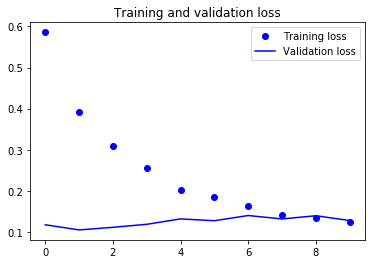

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

10.145460518815907

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam,Adagrad
from keras.layers import LSTM,Activation,Dense
from keras import metrics

model = Sequential()
# model.add(LSTM(64,return_sequences=True,input_shape=(None,float_data.shape[-1])))
# model.add(LSTM(16,activation='relu'))
# model.add(LSTM(32,return_sequences=True))
# model.add( Activation('linear') )

# model.add(Dense(88))

model.add(layers.GRU(256,return_sequences=True,activation='relu',input_shape=(None, float_data.shape[-1])))
# model.add(layers.GRU(64,activation='relu',return_sequences=True))
model.add(layers.GRU(128,return_sequences=True,dropout=0.2,activation='relu'))
model.add(layers.GRU(16,dropout=0.2,activation='relu'))


# # , activation='relu'
model.add(Dense(1))
# 、, metrics=[metrics.mae]
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.005))

# model.compile(optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0), loss='mse')
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_steps,
                              epochs=5,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/5
1250/1250 [==============================] - 353s 282ms/step - loss: 0.1499 - val_loss: 0.1908
Epoch 2/5
1250/1250 [==============================] - 380s 304ms/step - loss: 0.1162 - val_loss: 0.1983
Epoch 3/5
1250/1250 [==============================] - 450s 360ms/step - loss: 0.1191 - val_loss: 0.1872
Epoch 4/5
1250/1250 [==============================] - 481s 385ms/step - loss: 0.1211 - val_loss: 0.2203
Epoch 5/5
1250/1250 [==============================] - 445s 356ms/step - loss: 0.1222 - val_loss: 0.2064


In [20]:
val_steps

243

In [69]:
def evaluate_naive_method1(steps,gen):
    batch_maes = []
    pred = []
    target = []
    for step in range(steps):
        samples, targets = next(gen)
        preds = model.predict(samples)
        pred.append(preds)
        target.append(targets)
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print('steps:{}，平均误差：{}'.format(steps,np.mean(batch_maes)))
    return pred,target
pred,target = evaluate_naive_method1(val_steps,val_gen)

steps:243，平均误差：0.8933824524382608


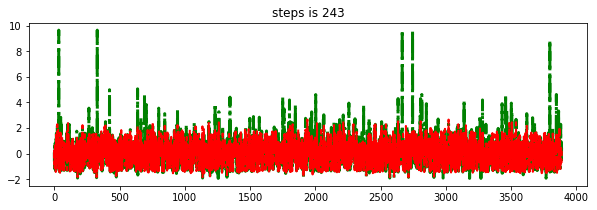

In [82]:
def plot_show1(pred,target,steps,flag):
    if flag:
        fea_nums = 1
    else:
        fea_nums = target[0].shape[1]
    for k in range(fea_nums):
        ans = []
        ans_1 = []
        for i in range(steps):
            for j in pred[i]:
                if flag:
                    ans.append(j)
                else:
                    ans.append(j[k])
            for j in target[i]:
                if flag:
                    ans_1.append(j)
                else:
                    ans_1.append(j[k])

        plt.figure(figsize=(10,3))
        plt.plot(range(len(ans_1)),ans_1,color='g',linewidth=3.0,linestyle='-.')
        plt.plot(range(len(ans)),ans,color='red',linewidth=2.0,linestyle='--')
        plt.title('steps is '+str(steps)+', col is '+str(k))
        plt.title('steps is '+str(steps))
        plt.show()
plot_show1(pred,target,val_steps,True)

In [22]:
target[0].shape

(16,)

In [25]:
def evaluate_naive_method1():
    batch_maes = []
    pred = []
    target = []
    for step in range(test_steps):
        samples, targets = next(test_gen)
#         print(targets.shape)
#         break
        preds = model.predict(samples)
        pred.append(preds)
        target.append(targets)
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    return pred,target
pred_test,target_test = evaluate_naive_method1()

0.8155891725820283


In [27]:
test_steps

127

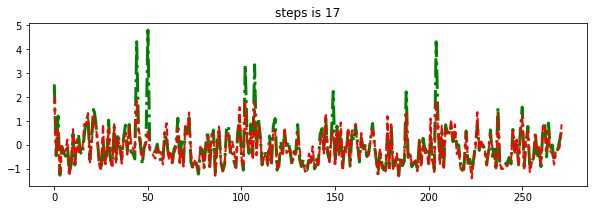

In [34]:
#单个特征时
def plot_show1(steps):
    ans = []
    ans_1 = []
    for k in range(steps):
        
        for i in pred_test[k]:
            ans.append(i)
        for i in target_test[k]:
            ans_1.append(i)
    plt.figure(figsize=(10,3))
    plt.plot(range(len(ans_1)),ans_1,color='g',linewidth=3.0,linestyle='-.')
    plt.plot(range(len(ans)),ans,color='red',linewidth=2.0,linestyle='--')

    plt.title('steps is '+str(steps))



    plt.show()
plot_show1(17)

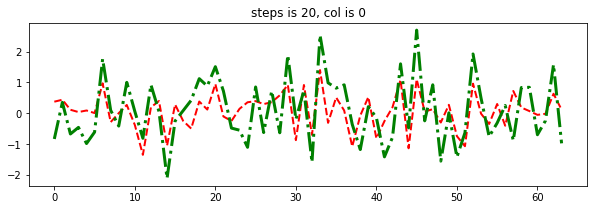

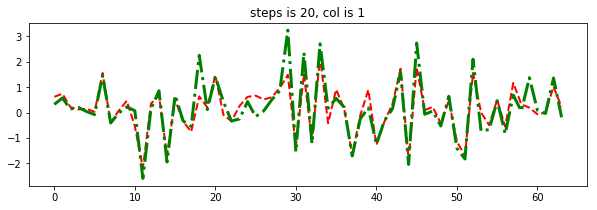

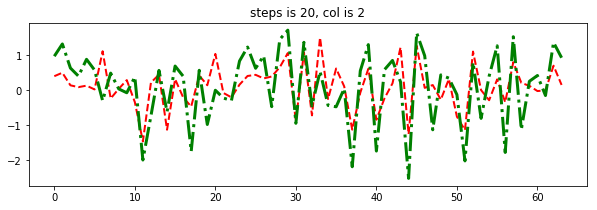

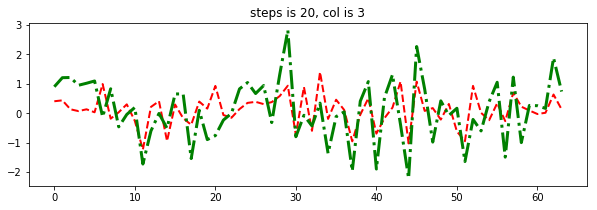

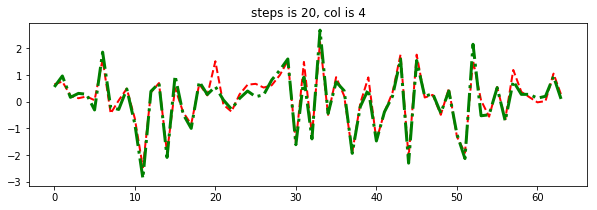

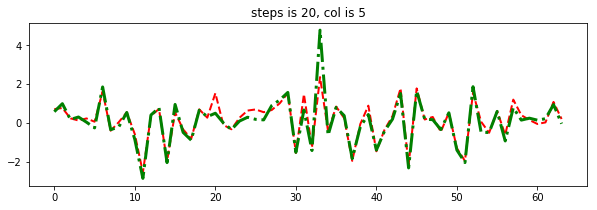

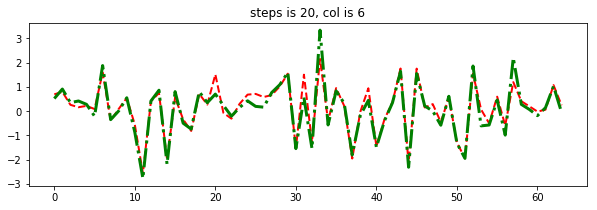

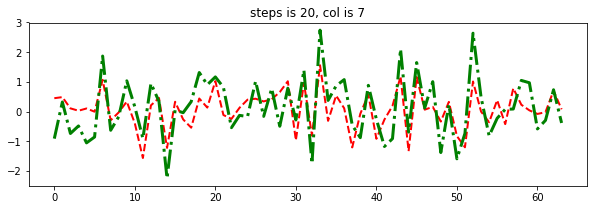

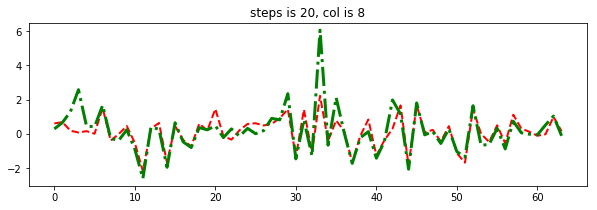

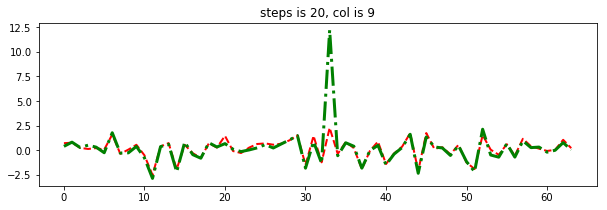

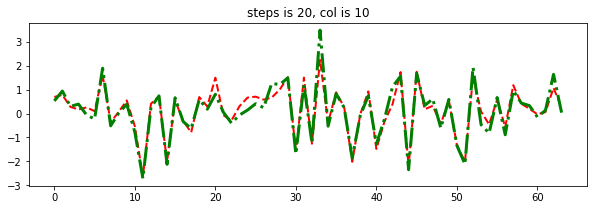

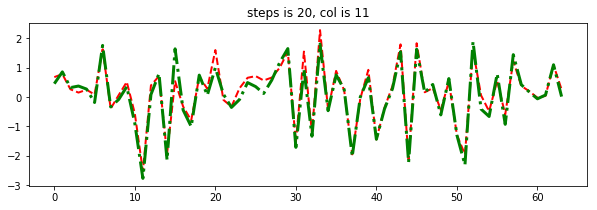

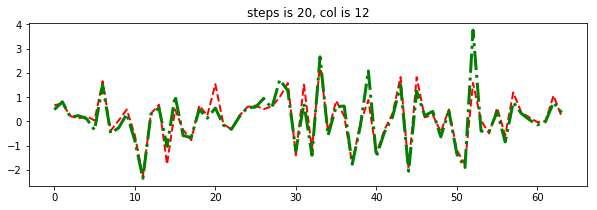

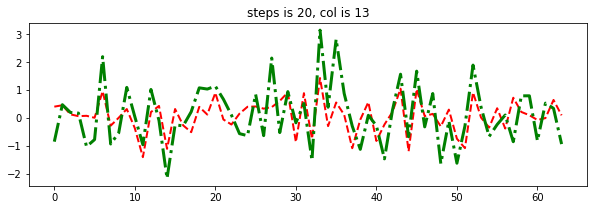

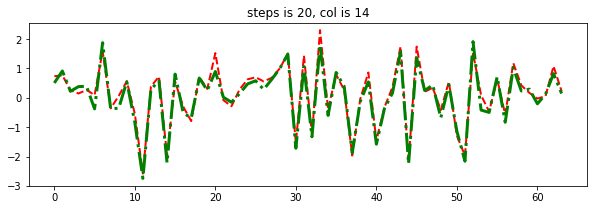

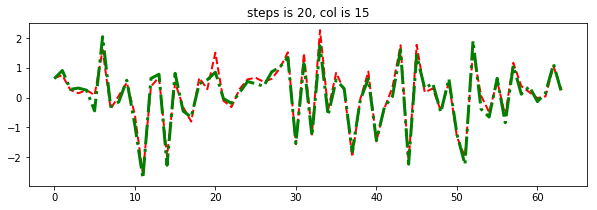

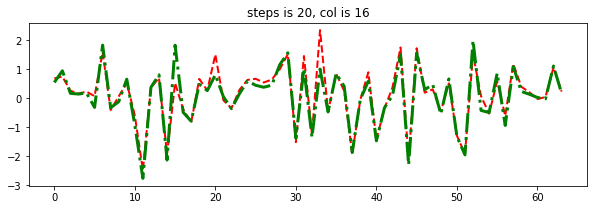

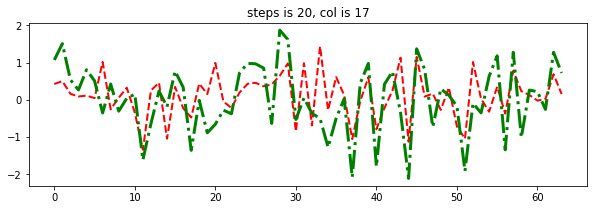

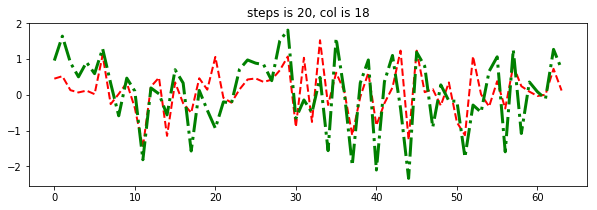

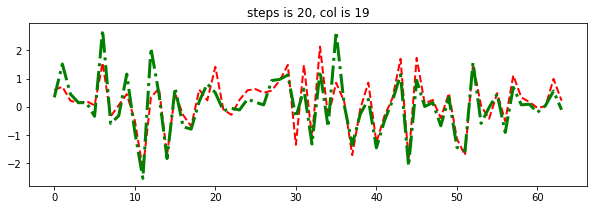

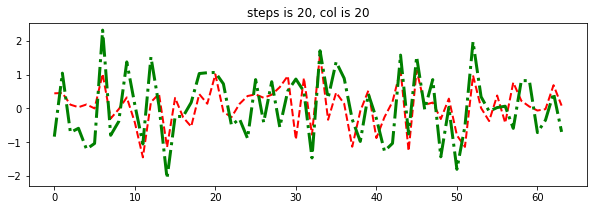

In [39]:
# def plot_show1(steps):
#     for k in range(target[0].shape[1]):
#         ans = []
#         ans_1 = []
#         for i in pred_test[steps]:
#             ans.append(i[k])
#         for i in target_test[steps]:
#             ans_1.append(i[k])
#         plt.figure(figsize=(10,3))
#         plt.plot(range(len(ans)),ans,color='red',linewidth=2.0,linestyle='--')
#         plt.plot(range(len(ans_1)),ans_1,color='g',linewidth=3.0,linestyle='-.')
#         plt.title('steps is '+str(steps)+', col is '+str(k))
#         plt.show()
# plot_show1(20)

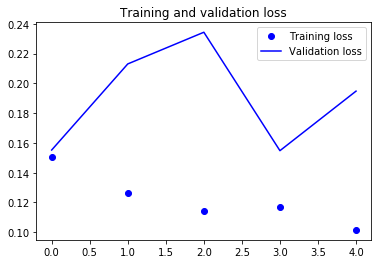

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()